In [1]:
library(tidyverse)
library(ggplot2)
data <- read_csv("https://github.com/matthewzizek/dsci-100-project/raw/main/data/processed.cleveland.data")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to qu

In [2]:
tibble <- data |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

tibble

age,chol
<dbl>,<dbl>
67,286
67,229
37,250
41,204
56,236
62,268
57,354
63,254
53,203


In [3]:
randomized_data <- data |>
  sample_frac(1)

num_rows <- nrow(randomized_data) / 2

tibble1 <- randomized_data |>
  slice(1:num_rows) |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

tibble2 <- randomized_data |>
  slice((num_rows + 1):(num_rows * 2)) |>
  select(1, 5) |>
  rename(age = 1, chol = 2)

tibble1
tibble2

age,chol
<dbl>,<dbl>
47,253
55,205
54,273
63,195
52,186
57,354
44,290
59,273
61,203


age,chol
<dbl>,<dbl>
43,247
47,275
58,197
68,211
71,265
57,289
52,201
56,193
41,157


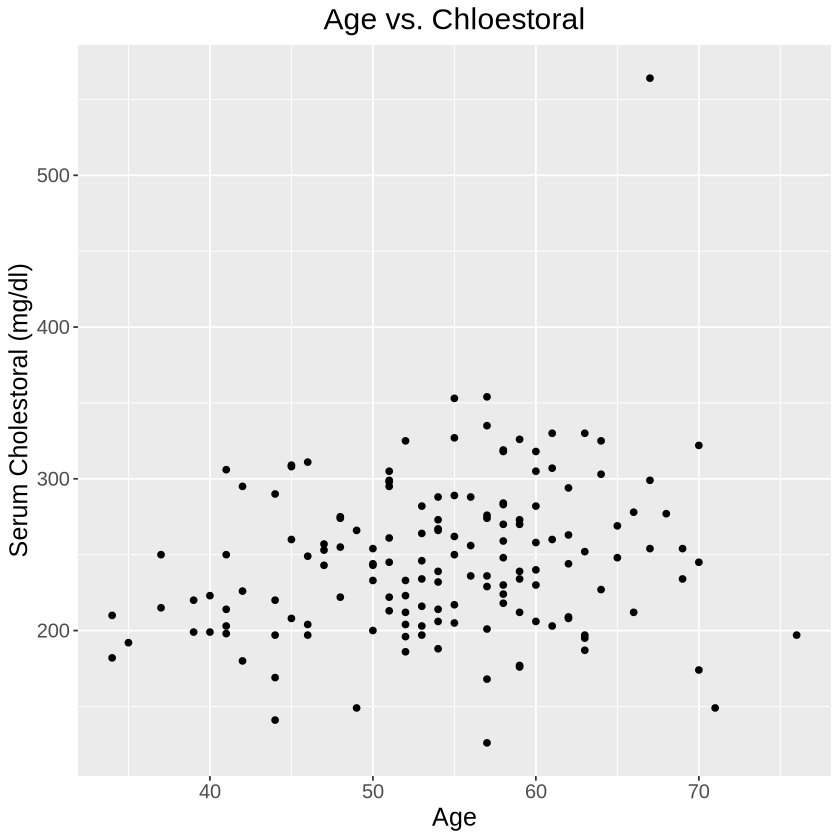

In [8]:
cleveland_splot <- tibble1 |>
                    ggplot(aes(x = age, y = chol)) +
                    geom_point() +
                    labs(x = "Age", y = "Serum Cholestoral (mg/dl)", title = "Age vs. Chloestoral") +
                    theme(text = element_text(size = 15)) +
                    theme(plot.title=element_text(hjust = 0.5))
cleveland_splot

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


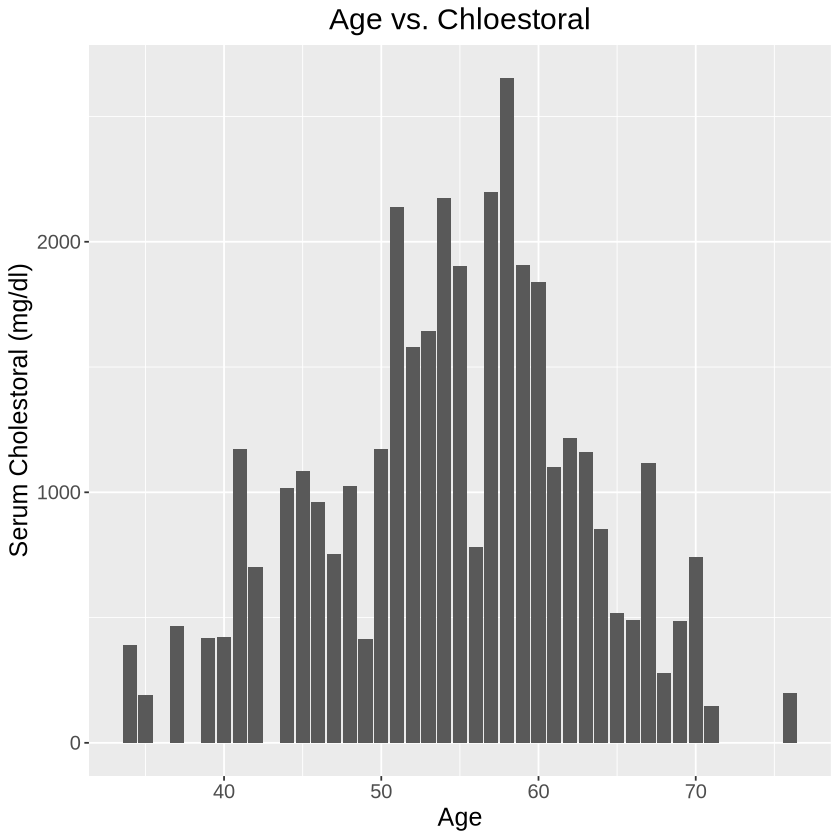

In [7]:
cleveland_histogram <- tibble1 |>
                    ggplot(aes(x = age, y = chol)) +
                    geom_histogram(stat = "identity") +
                    labs(x = "Age", y = "Serum Cholestoral (mg/dl)", title = "Age vs. Chloestoral") +
                    theme(text = element_text(size = 15)) +
                    theme(plot.title=element_text(hjust = 0.5))
cleveland_histogram